In [1]:
import yt
import numpy as np
from scipy import *
import yt.units as u

In [2]:
%matplotlib inline
import pylab as plt

In [3]:
my_header =  ['raw_density', 'x-velocity','y-velocity','z-velocity', 'pressure_nt',
                  'raw_pressure','metallicity','ref','H','E','H+','HE','HE+','HE++','H-','H2','H2+']

In [4]:
def density_alias(field, data):
    return data.ds.arr(data['raw_density'], 'code_mass/code_length**3')
def pressure_alias(field, data):
    return data.ds.arr(data['raw_pressure'], 'code_mass/code_time**2/code_length')

In [5]:
ds = yt.load("output_00028/info_00028.txt",fields=my_header)

yt : [INFO     ] 2018-07-21 12:41:51,080 Parameters: current_time              = 3.17276944493
yt : [INFO     ] 2018-07-21 12:41:51,081 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-21 12:41:51,082 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-07-21 12:41:51,083 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-07-21 12:41:51,085 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-21 12:41:51,086 Parameters: current_redshift          = 5.99989573952965
yt : [INFO     ] 2018-07-21 12:41:51,087 Parameters: omega_lambda              = 0.691999971866608
yt : [INFO     ] 2018-07-21 12:41:51,088 Parameters: omega_matter              = 0.30799999833107
yt : [INFO     ] 2018-07-21 12:41:51,089 Parameters: hubble_constant           = 0.677900009155273


In [6]:
ds.add_field('density', function=density_alias, units='g/cm**3',
             sampling_type='cell',force_override=True)
ds.add_field('pressure', function=pressure_alias, units='g/cm/s**2',
             sampling_type='cell',force_override=True)

In [7]:
center_init = [ 0.53095117,  0.51029149,  0.50401411]
los_vec = [ 0.9,    0.3082207, 0.3082207]
mms = 512
size = 0.00166389148881
size_kpc = 7.0
up_vec = [ 0.3082207,  0.9, 0.3082207]

yt : [INFO     ] 2018-07-21 12:42:27,860 Projection completed
yt : [INFO     ] 2018-07-21 12:42:27,861 xlim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 12:42:27,862 ylim = 0.030951 1.030951
yt : [INFO     ] 2018-07-21 12:42:27,863 xlim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 12:42:27,864 ylim = 0.030951 1.030951
yt : [INFO     ] 2018-07-21 12:42:27,867 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-07-21 12:42:28,861 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



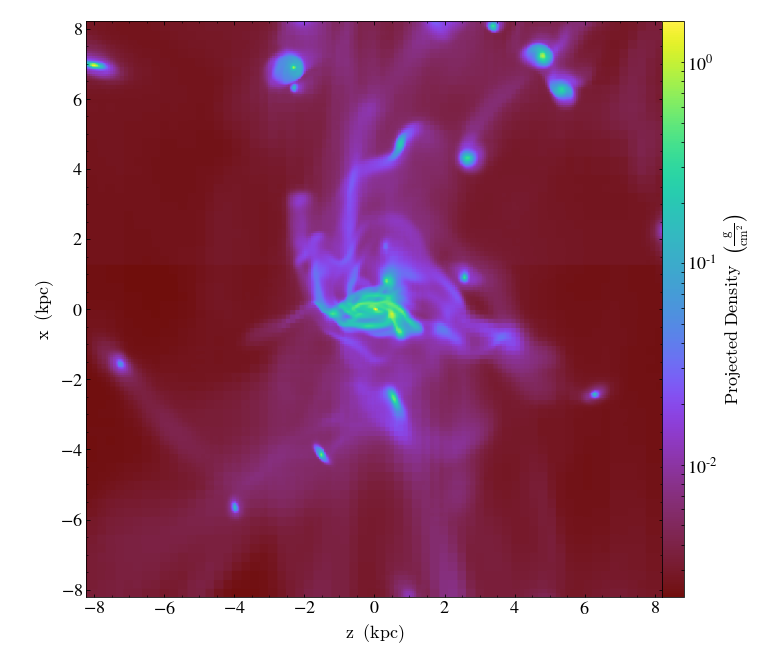

In [8]:
p = yt.ProjectionPlot(ds,'y','density',center_init)
#p.annotate_grids()
p.zoom(256)

In [9]:
# Thomson scattering cross section
sigma_t = yt.YTQuantity(6.6524e-25,'cm**2')

In [10]:
# random sampling of ray direction
num_rays = 100
rtheta = np.arccos(1-2*np.random.rand(num_rays))
rphi = np.random.rand(num_rays)*2*pi

In [12]:
# radius of the ray path
radius = 4*u.kpc
r_norm = np.array(radius/ds.domain_width.in_units('kpc')[0])

In [15]:
# loop to sample light rays
tau = []
dcol = []
for i in range(num_rays):
    theta = rtheta[i]
    phi = rphi[i]
    endpos = center_init + r_norm*[sin(theta)*cos(phi), sin(theta)*sin(phi), cos(phi)]
    ray = ds.ray(center_init, endpos)
    dens_col=np.sum(ray['density']*ray['dx'])/u.mass_hydrogen * radius/np.sum(ray['dx'])
    tau.append(dens_col*sigma_t)
    dcol.append(dens_col)
    #print(col_dens.in_cgs())
tau = yt.YTArray(tau)
dcol = yt.YTArray(dcol)

In [16]:
tau.in_cgs()

YTArray([ 0.10874375,  0.07477113,  0.2244672 ,  0.62918659,  0.20947625,
        0.16398879,  0.33273247,  0.39784884,  0.31773599,  0.2485268 ,
        0.10607045,  0.35327083,  0.38746478,  0.57015767,  0.07645623,
        0.15339522,  0.15323497,  0.19086131,  0.17392235,  0.09645265,
        0.17494419,  0.20032489,  0.11880015,  0.39683057,  1.24077742,
        0.42715865,  0.10092579,  1.071258  ,  0.20803291,  0.15115084,
        0.43863517,  0.20781277,  0.15613977,  0.07205663,  0.46370171,
        0.22905299,  0.07283613,  0.54566587,  0.06847682,  0.16057871,
        0.20695537,  0.2339629 ,  0.13472647,  0.30231555,  0.13390414,
        0.24567947,  0.19334508,  0.34188065,  0.08330577,  0.18843631,
        0.17205419,  0.35214623,  0.14512334,  0.10430515,  0.54578952,
        0.15127243,  0.07295287,  0.18766627,  0.2365116 ,  0.07050031,
        0.28857404,  0.11968499,  0.16546766,  0.09505537,  0.33560377,
        0.32811751,  0.07760006,  0.16797986,  0.21789454,  0.

yt : [INFO     ] 2018-07-21 12:45:16,950 Projection completed
yt : [INFO     ] 2018-07-21 12:45:16,951 xlim = 0.010291 1.010291
yt : [INFO     ] 2018-07-21 12:45:16,953 ylim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 12:45:16,954 xlim = 0.010291 1.010291
yt : [INFO     ] 2018-07-21 12:45:16,956 ylim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 12:45:16,961 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-07-21 12:45:17,192 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



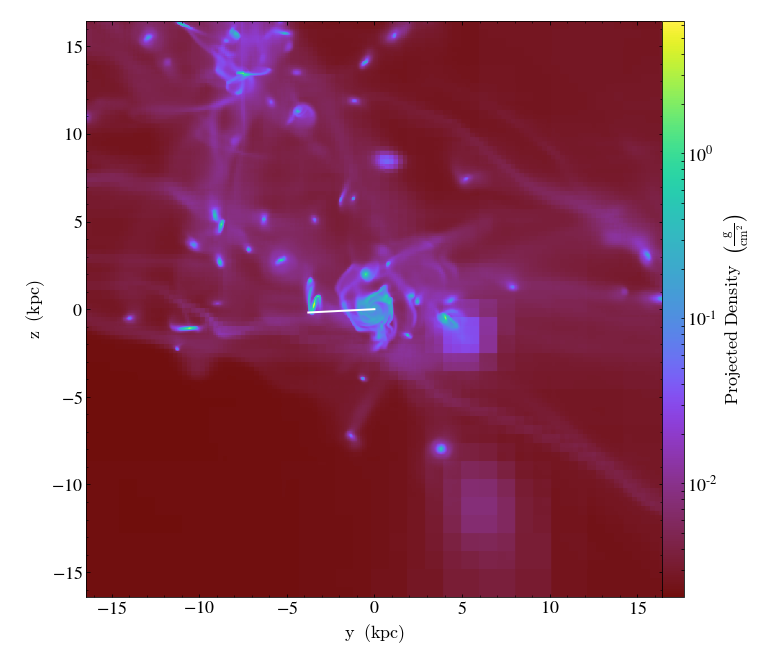

In [17]:
p = yt.ProjectionPlot(ds,'x','density',center_init)
#p = yt.SlicePlot(ds, 'y', 'density',center_init)
p.annotate_ray(ray)
p.zoom(128)

In [20]:
# column density distribution
p,bins = np.histogram(log10(dcol.in_cgs()))
bin_center = (bins[:-1]+bins[1:])/2.

Text(0,0.5,'count')

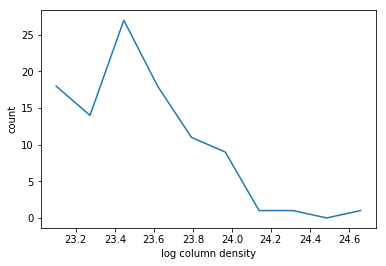

In [22]:
plt.plot(bin_center,p)
plt.xlabel(r'log column density')
plt.ylabel('count')